In [1]:
from keras.datasets import imdb

## Data Loading

In [2]:
# The argument num_words=10000 means you’ll only keep the top 10,000 most fre- quently occurring words in the training data.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000

In [5]:
# word_index is a dictionary mapping wordstoaninteger index.
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [9]:
# getting the reverse dictionary
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
# let us decode the view now
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Data Preparation

You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:<br>
    i. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).<br>
    ii. One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vec- tor that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

Let us go ahead with the second solution.

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  '''
  function to create one-hot encoding
  '''
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
  return results

In [14]:
# vectorizing the X_train and X_test

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# vectorizing the y_train and y_test
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model Building

There are two key architecture decisions to be made about such a stack of Dense layers: <br> i. How many layers to use<br>
ii. How many hidden units to choose for each layer<br>
We will go with simple architecture with ReLU activation function (to add non-linearity in the network) in each layer and the output layer as sigmoid (since the task at hand is binary classification).

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


We will use **binary_crossentropy** as loss function, which the network would try to optimize. <br>
Further, we will use **rmsprop** as optimiser algorithm.<br>
The metric here is **accuracy** since the ourput of our model is probability (not class) and accuracy could define the closeness of the output to the true value.

In [19]:
 model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


Getting the validation data from training dataset

In [23]:
x_val = x_train[:10000]    # retaining first 10000 observations as val
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


You’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the validation_data argument

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 53ms/step - loss: 0.5216 - accuracy: 0.7854 - val_loss: 0.3929 - val_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3154 - accuracy: 0.8995 - val_loss: 0.3088 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2268 - accuracy: 0.9280 - val_loss: 0.2793 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1801 - accuracy: 0.9399 - val_loss: 0.2766 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1463 - accuracy: 0.9543 - val_loss: 0.3192 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1223 - accuracy: 0.9609 - val_loss: 0.2940 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1013 - accuracy: 0.9693 - val_loss: 0.3069 - val_accuracy: 0.8855
Epoch 8/20
30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side.

Plotting the training and validation loss

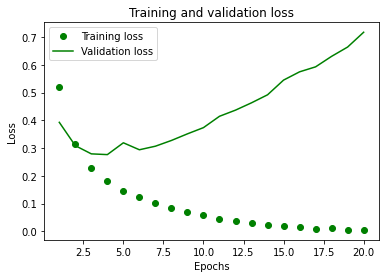

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

Plotting the training and validation accuracy

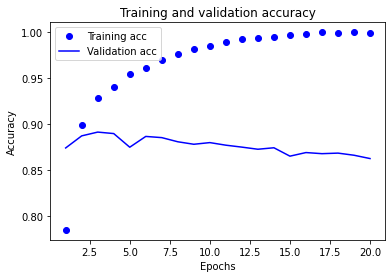

In [33]:
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the obtained results, we notice that the model is clearly overfitting. To prevent overfitting, you could stop training after three epochs

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/4
30/30 [==============================] - 2s 51ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.7495 - val_accuracy: 0.8645
Epoch 2/4
30/30 [==============================] - 1s 39ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.7825 - val_accuracy: 0.8632
Epoch 3/4
30/30 [==============================] - 1s 40ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.8120 - val_accuracy: 0.8638
Epoch 4/4
30/30 [==============================] - 2s 57ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.8484 - val_accuracy: 0.8629


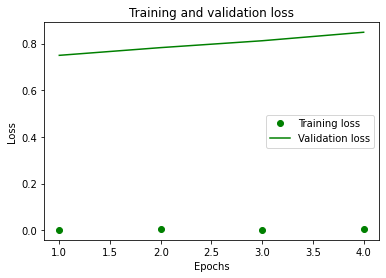

In [44]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

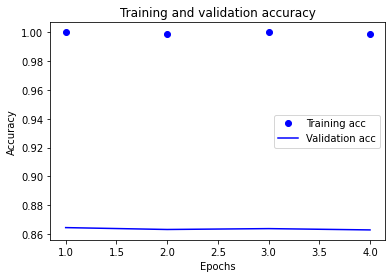

In [45]:
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let us use this model for prediction.

In [49]:
pred_prob = model.predict(x_test)

In [50]:
thres = 0.5

pred_class = [1 if i>thres else 0 for i in pred_prob]

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_class)

array([[10800,  1700],
       [ 2118, 10382]])

**Conclusion:**<br>From the above obtained confusion matrix, we note that the obtained result is reliable to a good extent. Further tweaking, change in procedure could be done, to further reduce the number of False Positives and False Negatives. The same of course depedens upon the task at hand, project requirement, availability of time and resources.